In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
data = []
labels = []
# The dataset is available at: 
# https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
data_path = "Data/Train/"
num_classes = len(os.listdir(data_path))
print("Number of classes:", num_classes)

Number of classes: 43


In [3]:
# Retrieving the images and their labels
for i in range(num_classes):
    path = os.path.join(data_path, str(i))
    images = os.listdir(path) 
    for img in images:
        try:
            image = Image.open(path + "\\" + img)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print("Shape of train images:", data.shape)
print("Shape of train labels:", labels.shape)

Shape of train images: (39209, 30, 30, 3)
Shape of train labels: (39209,)


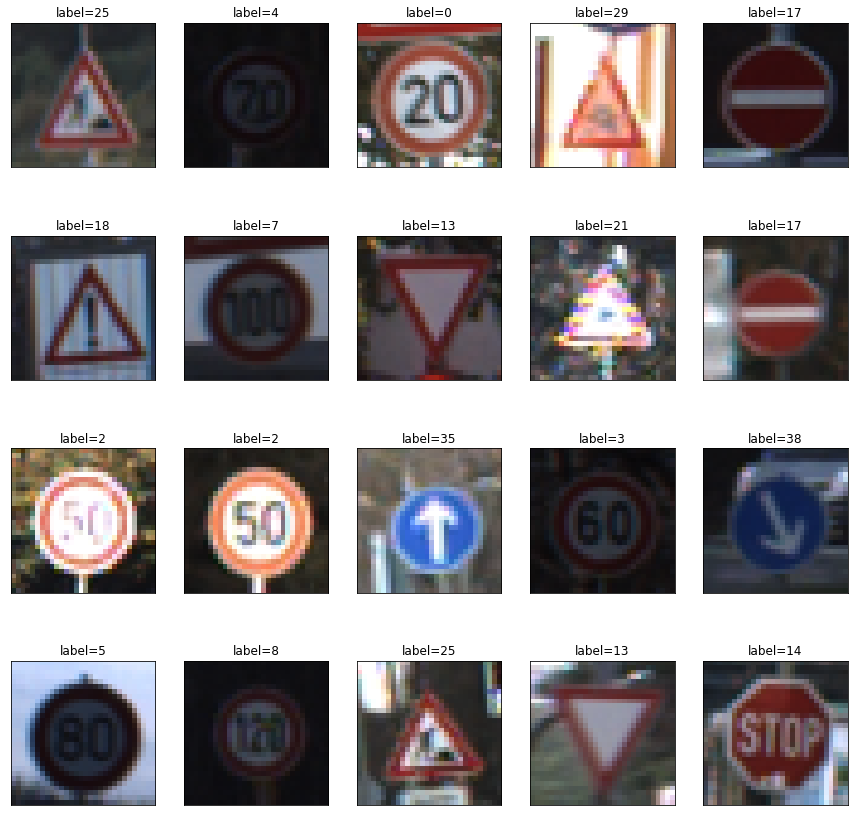

In [5]:
# Visualizing some traffic signs classes
num_samples = 20
plt.figure(figsize=(15, 15))
for i in range(num_samples):
    rand_img = random.randint(0, data.shape[0] - num_samples)
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(data[i + rand_img])
    plt.title("label=" + str(labels[i + rand_img]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=10)

print("Shape of X_train set feature:", X_train.shape)
print("Shape of X_test set feature:", X_test.shape)
print("Shape of y_train set label:", y_train.shape)
print("Shape of y_test set label:", y_test.shape)

Shape of X_train set feature: (31367, 30, 30, 3)
Shape of X_test set feature: (7842, 30, 30, 3)
Shape of y_train set label: (31367,)
Shape of y_test set label: (7842,)


In [7]:
# Standardize the input images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# One hot encoding the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
# Building the MLP model
model = Sequential()
model.add(tf.keras.Input(shape=X_train[1].shape))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2700)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               691456    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                11051     
Total params: 768,299
Trainable params: 768,299
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiling the model
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [10]:
# Fitting the model
epochs = 30
model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
491/491 [==============================] - 4s 8ms/step - loss: 2.9257 - accuracy: 0.2398 - val_loss: 1.4406 - val_accuracy: 0.5858
Epoch 2/30
491/491 [==============================] - 3s 5ms/step - loss: 1.2716 - accuracy: 0.6355 - val_loss: 0.6761 - val_accuracy: 0.8261
Epoch 3/30
491/491 [==============================] - 3s 6ms/step - loss: 0.7894 - accuracy: 0.7731 - val_loss: 0.4843 - val_accuracy: 0.8738
Epoch 4/30
491/491 [==============================] - 3s 7ms/step - loss: 0.5976 - accuracy: 0.8286 - val_loss: 0.4828 - val_accuracy: 0.8773
Epoch 5/30
491/491 [==============================] - 3s 6ms/step - loss: 0.5121 - accuracy: 0.8516 - val_loss: 0.3779 - val_accuracy: 0.8949
Epoch 6/30
491/491 [==============================] - 3s 6ms/step - loss: 0.4489 - accuracy: 0.8697 - val_loss: 0.3095 - val_accuracy: 0.9139
Epoch 7/30
491/491 [==============================] - 3s 6ms/step - loss: 0.3794 - accuracy: 0.8887 - val_loss: 0.3290 - val_accuracy: 0.9153
Epoch 

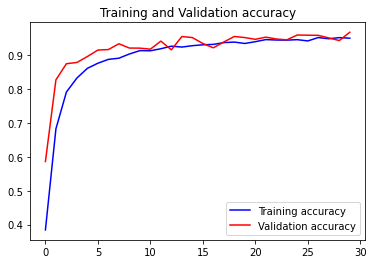

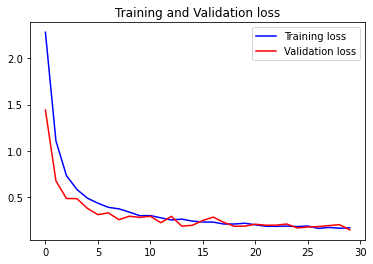

In [11]:
# Plotting the accuracy and loss values
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(acc, 'b', label='Training accuracy')
plt.plot(val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [12]:
# Accuracy on train dataset
train_pred = model.predict(X_train)
train_pred = np.argmax(train_pred, axis=1)
train_labels = np.argmax(y_train, axis=1)
print("Train Accuracy: {:.4f}\n".format(accuracy_score(train_labels, train_pred)))

Train Accuracy: 0.9820



In [13]:
# Loading test images
test_file = pd.read_csv(os.path.join("Data", "Test.csv"))
test_labels = test_file["ClassId"].values
test_imgs = test_file["Path"].values
test_data = []

test_file.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [14]:
# Retrieving the images for testing
for img in test_imgs:
    try:
        image = Image.open(os.path.join("Data", img))
        image = image.resize((30, 30))
        test_data.append(np.array(image))
    except:
        print("Error loading image")

test_data = np.array(test_data)
print("Shape of test images:", test_data.shape)
print("Shape of test labels:", test_labels.shape)

Shape of test images: (12630, 30, 30, 3)
Shape of test labels: (12630,)


In [15]:
# Accuracy on test dataset
test_pred = model.predict(test_data)
test_pred = np.argmax(test_pred, axis=1)
print("Test Accuracy: {:.4f}\n".format(accuracy_score(test_labels, test_pred)))

Test Accuracy: 0.8621



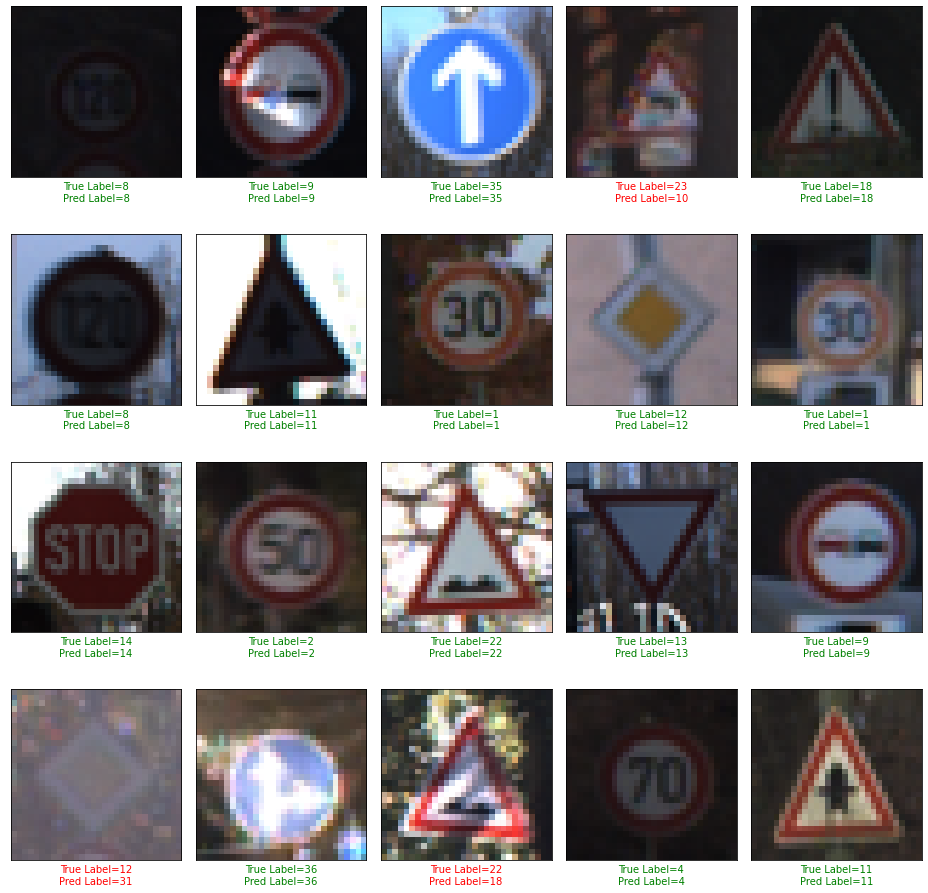

In [16]:
# Visualize model predictions
plt.figure(figsize=(13, 13))
num_samples = 20
for i in range(num_samples):
    rand_img = random.randint(0, test_data.shape[0] - num_samples)
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    pred_lbl = test_pred[i + rand_img]
    true_lbl = test_labels[i + rand_img]
    lbl_color = 'g'
    if pred_lbl != true_lbl:
        lbl_color = 'r'
    plt.xlabel("True Label={}\nPred Label={}".format(true_lbl, pred_lbl), color=lbl_color)
    plt.imshow(test_data[i + rand_img])
plt.tight_layout()
plt.show()